# Dữ liệu không loại bỏ các mẫu chứa trường có giá trị NA

Import các thư viện cần thiết
- `pandas`: thư viện phân tích dữ liệu
- `seaborn`: thư viện trực quan hóa dữ liệu
- `matplotlib.pyplot`: thư viện trực quan hóa dữ liệu
- `numpy`: thư viện tính toán khoa học
- `time`: thư viện đo thời gian
- `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`: giảm chiều sử dụng phương pháp LDA
- `sklearn.decomposition.PCA`: giảm chiều sử dụng phương pháp PCA
- `sklearn.preprocessing.StandardScaler`: chuẩn hóa dữ liệu
- `sklearn.model_selection.train_test_split`: chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
- `sklearn.mixture.GaussianMixture`: mô hình phân cụm trộn Gauss
- `sklearn.naive_bayes.GaussianNB`: mô hình phân loại Gaussian Naive Bayes
- `sklearn.linear_model.LogisticRegression`: mô hình phân loại hồi quy Logistic
- `sklearn.metrics.accuracy_score, recall_score, precision_score`: các hàm tính toán các độ đo để đánh giá mô hình phân loại
- `from sklearn.metrics import silhouette_score, davies_bouldin_score`: các hàm tính toán độ đo để đánh giá mô hình phân cụm

In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np, time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

Đọc dữ liệu từ file `earthquakes.csv` rồi in ra thông tin của dataframe bằng hàm `info()`

In [2]:
# Read data
# Change data path on your computer
data_path = 'earthquakes.csv'
data = pd.read_csv(data_path)
# Print the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1137 non-null   object 
 1   magnitude        1137 non-null   float64
 2   type             1137 non-null   object 
 3   title            1137 non-null   object 
 4   date             1137 non-null   object 
 5   time             1137 non-null   int64  
 6   updated          1137 non-null   int64  
 7   url              1137 non-null   object 
 8   detailUrl        1137 non-null   object 
 9   felt             1137 non-null   int64  
 10  cdi              1137 non-null   int64  
 11  mmi              1137 non-null   int64  
 12  alert            764 non-null    object 
 13  status           1137 non-null   object 
 14  tsunami          1137 non-null   int64  
 15  sig              1137 non-null   int64  
 16  net              1137 non-null   object 
 17  code          

In ra thống kê sơ bộ về dữ liệu bằng hàm `describe()`

In [3]:
# Print the data description
data.describe()

,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap,depth,latitude,longitude,distanceKM,postcode,timezone
count,1137.000000,1.137000e+03,1.137000e+03,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,197.000000,1137.000000
mean,4.856675,1.712109e+12,1.716593e+12,414.408091,2.925242,4.320141,0.059807,432.698329,115.094107,1.342604,0.585974,55.055286,41.287300,27.308909,-3.930635,52.289358,83086.131980,21.741425
std,1.047840,1.143033e+10,9.671955e+09,5746.971362,2.562707,1.453949,0.237232,256.177844,91.877870,1.704364,0.308556,37.609237,87.866489,20.133139,118.043697,56.027469,12812.555204,440.864430
min,3.000000,1.687542e+12,1.693083e+12,0.000000,0.000000,1.000000,0.000000,138.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-43.706400,-179.807000,0.000000,8833.000000,-720.000000
25%,3.800000,1.701663e+12,1.707609e+12,0.000000,0.000000,4.000000,0.000000,234.000000,37.000000,0.100000,0.300000,30.000000,7.550000,24.195400,-104.452000,15.000000,79331.000000,-360.000000
50%,5.300000,1.713810e+12,1.719958e+12,2.000000,3.000000,4.000000,0.000000,449.000000,102.000000,0.680000,0.630000,49.000000,10.000000,31.667700,-68.682000,37.000000,79772.000000,-180.000000
75%,5.600000,1.722885e+12,1.725384e+12,24.000000,5.000000,5.000000,0.000000,518.000000,157.000000,2.061000,0.780000,68.000000,34.723000,37.497600,126.628000,61.000000,92530.000000,480.000000
max,7.600000,1.726661e+12,1.726672e+12,183786.000000,9.000000,9.000000,1.000000,2419.000000,619.000000,12.457000,2.520000,256.000000,639.503000,68.176100,179.972000,298.000000,99827.000000,780.000000


## Tiền xử lý dữ liệu

- Hàm `data.drop()` để bỏ đi những thuộc tính (cột) không liên quan đến việc phân loại cảnh báo động đất
- Sử dụng hàm `data.fillna()` để thay những giá trị NaN trong dữ liệu gốc bằng `unknown`
- Đoạn code thực hiện việc one-hot coding
```python
for column in string_columns:
    dummies = pd.get_dummies(data[column], prefix='type')
    data.drop([column], axis=1, inplace=True)
    data = pd.concat([data, dummies], axis=1)

In [4]:
# Remove some features that aren't important for classify / clustering the alert of the earthquake
# Feature 'date' is already converted to float type in the original dataset 
data.drop(['id', 'date', 'title', 'url', 'detailUrl', 'ids', 'sources',
           'types', 'net', 'code', 'geometryType', 'status',
           'postcode', 'what3words', 'locationDetails'], axis=1, inplace=True)

# Replace Null value of column 'alert' to unknown 
data.fillna({'alert': 'unknown'}, inplace=True)

# NA-value columns will be filled by 'unknown' value
na_column = data.columns[data.isna().any()].tolist()

for column in na_column:
    data.fillna({column: 'unknown'}, inplace=True)

# String-value columns will be one-hot coding
string_columns = data.select_dtypes(include=['object']).columns.tolist()
string_columns.remove('alert')

# One-hot coding
for column in string_columns:
    dummies = pd.get_dummies(data[column], prefix='type')
    data.drop([column], axis=1, inplace=True)
    data = pd.concat([data, dummies], axis=1)

Đặt các tập mẫu `x_data` và tập nhãn `y_data`. Sử dụng `StanStandardScaler().fit_transfrom` để chuẩn hóa dữ liệu

In [5]:
# Sample set x_data and label set y_data 
x_data = data.drop(['alert'], axis=1)
x_data = StandardScaler().fit_transform(x_data)
y_data = data['alert']

## Giảm chiều dữ liệu
### Phương pháp PCA

In [6]:
# Dimensionality reduction
# Using PCA method
pca_plot = PCA(n_components=3, random_state=42)
x_data_pca_plot = pca_plot.fit_transform(x_data)

# Data visualization
pc_x = x_data_pca_plot[:, 0]
pc_y = x_data_pca_plot[:, 1]
pc_z = x_data_pca_plot[:, 2]
# Reset color
custom_palette = {'red': "red", 'yellow': "yellow", 'green': "green", 'unknown': "purple", 'orange': "orange"}

**Trực quan hóa dữ liệu bằng biểu đồ 2D**

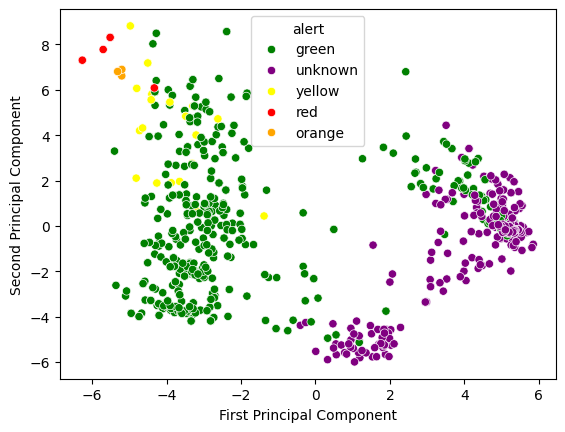

In [7]:
# Creat 2D scatter plot
plot_pca = sns.scatterplot(x=pc_x, y=pc_y, hue=y_data, palette=custom_palette)
# Rename axis
plot_pca.set(xlabel="First Principal Component", ylabel="Second Principal Component")
plt.show()

**Trực quan hóa dữ liệu bằng biểu đồ 3D**

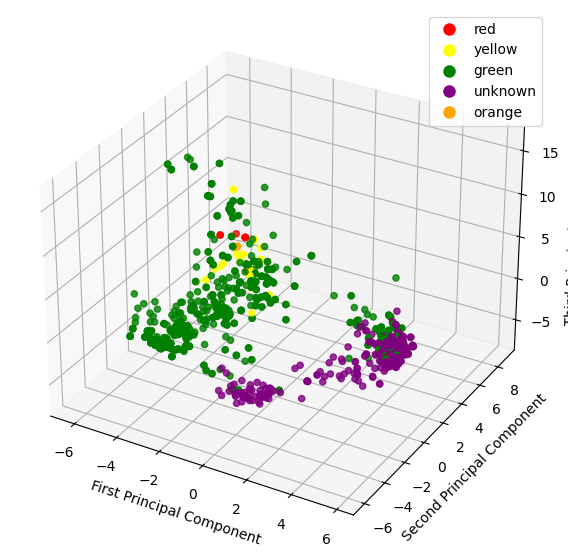

In [8]:
# Tạo biểu đồ 3D
fig_pca = plt.figure(figsize=(10, 7))
ax_pca = fig_pca.add_subplot(111, projection='3d')

# Vẽ scatter plot
colors = [custom_palette[label] for label in y_data]
sc_pca = ax_pca.scatter(pc_x, pc_y, pc_z, c=colors, alpha=0.8)

# Đặt tên trục
ax_pca.set_xlabel("First Principal Component")
ax_pca.set_ylabel("Second Principal Component")
ax_pca.set_zlabel("Third Principal Component")

# Tạo chú thích màu sắc
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
           for label, color in custom_palette.items()]
ax_pca.legend(handles=handles, loc='best')

# Hiển thị biểu đồ
plt.show()

**Đánh giá các thành phần chính theo tham số thống kê** và **Xác định lượng thông tin được bảo tồn theo phương sai giải thích**

In [9]:
# Print the explained variance after reduce dimension of the data 
print(f'Explained variance: {np.cumsum(pca_plot.explained_variance_ratio_)}')
# Print the statistic values of Principal Component
pd.DataFrame(data=x_data_pca_plot,
             columns=['First Principal Component', 'Second Principal Component',
                      'Third Principal Component']).describe()

Explained variance: [0.00903826 0.01440742 0.01951722]


,First Principal Component,Second Principal Component,Third Principal Component
count,1.137000e+03,1.137000e+03,1.137000e+03
mean,-6.749219e-16,-9.998842e-17,-9.998842e-17
std,3.922704e+00,3.023408e+00,2.949476e+00
min,-6.260835e+00,-5.993419e+00,-7.024995e+00
25%,-3.468310e+00,-2.278748e+00,-1.291434e+00
50%,-2.370451e+00,-2.113844e-02,-4.387583e-01
75%,4.635973e+00,1.561196e+00,2.453622e-01
max,5.847594e+00,8.813079e+00,1.599704e+01


**Thực hiện hiển thị trực quan đối với dữ liệu theo từng cặp 02 thành phần chính**

<Figure size 1500x1000 with 0 Axes>

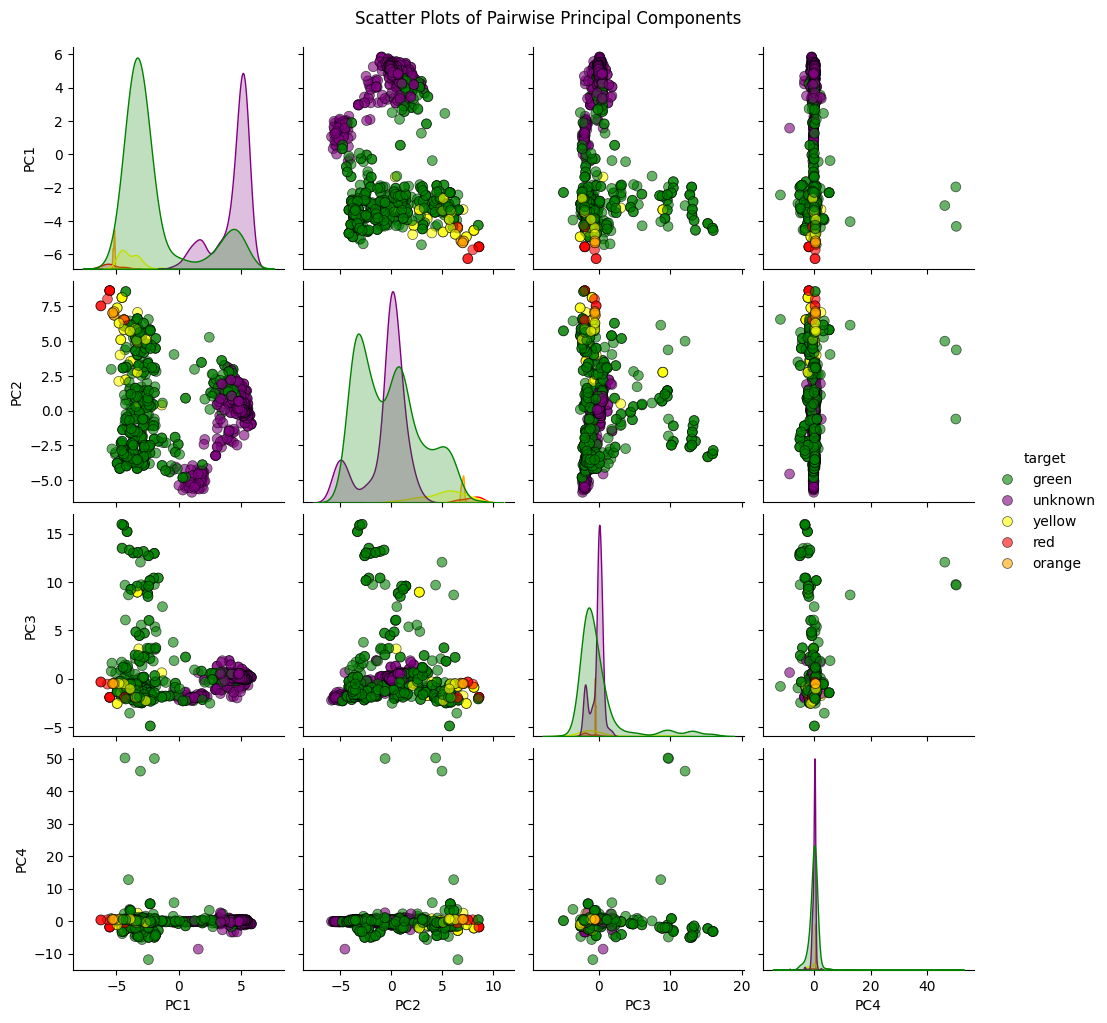

In [10]:
# Apply PCA with 4 components
pca_pair = PCA(n_components=4)
x_data_pca_pair = pca_pair.fit_transform(x_data)

# Create a DataFrame for the PCA data
data_pca_pair = pd.DataFrame(x_data_pca_pair, columns=[f'PC{i + 1}' for i in range(4)])
data_pca_pair['target'] = y_data

# Plot the pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(data_pca_pair, hue='target', diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k'},
             vars=[f'PC{i + 1}' for i in range(4)], palette=custom_palette)
plt.suptitle("Scatter Plots of Pairwise Principal Components", y=1.02)
plt.show()

## Phân cụm dữ liệu

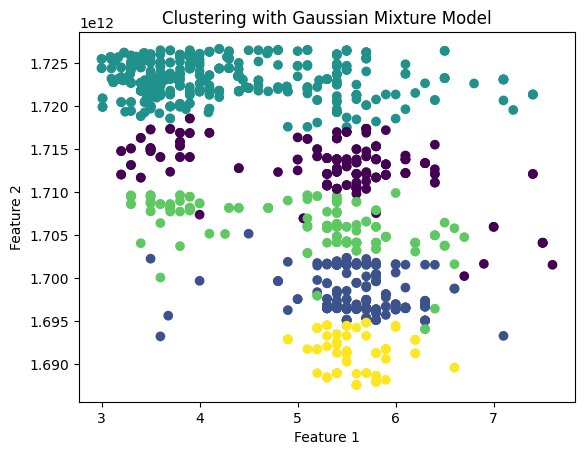

In [12]:
# Create a copy of data to store the clustering results
data_gmm = data.copy()
dummies = pd.get_dummies(data_gmm['alert'], prefix='type')
data_gmm.drop(['alert'], axis=1, inplace=True)
data_gmm = pd.concat([data_gmm, dummies], axis=1)
pd.DataFrame(data_gmm)

# Train the model
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(data_gmm)

# Predict the labels
labels_gmm = gmm.predict(data_gmm)
# Thêm cột nhãn cụm vào dữ liệu
data_gmm = np.hstack((data, labels_gmm.reshape(-1, 1)))

# Visualize the results
plt.scatter(data_gmm[:, 0], data_gmm[:, 1], c=labels_gmm, cmap='viridis')
plt.title('Clustering with Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Phân loại thuộc tính alert

Hàm để chia tập train - test

In [12]:
# Function to split the training set and validation set
def split_data(x_data, y_data, test_size):
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size=test_size,
                                                        random_state=42)
    return x_train, x_test, y_train, y_test

Các hàm thực hiện việc phân loại thuộc tính alert. Các phương pháp nhóm sử dụng
- Gaussian Naive Bayes Classifier
- Multinomial Logistic Regression (Softmax)

In [13]:
def evaluate_model(start_time, end_time, y_test, y_pred):
    print(f'Training time: {end_time - start_time}s')
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print(f'Recall score: {recall_score(y_test, y_pred, average='macro')}')
    print(f'Precision score: {precision_score(y_test, y_pred, average='macro', zero_division=0)}')


# This function uses the Naive Bayes classifier approach
def naive_bayes_approach(x_train, x_test, y_train, y_test):
    # Train model
    start_time = time.perf_counter()
    model = GaussianNB()
    model.fit(x_train, y_train)
    end_time = time.perf_counter()

    # Predict the result
    y_pred = model.predict(x_test)

    # Evaluate the model
    evaluate_model(start_time, end_time, y_test, y_pred)


# This function uses the Multinomial Logistic Regression approach
def softmax_approach(x_train, x_test, y_train, y_test):
    # Train model
    start_time = time.perf_counter()
    model = LogisticRegression(max_iter=5000, solver='saga')
    model.fit(x_train, y_train)
    end_time = time.perf_counter()

    # Predict the result
    y_pred = model.predict(x_test)

    # Evaluate the model
    evaluate_model(start_time, end_time, y_test, y_pred)

Các hàm thực hiện phân loại theo 3 kịch bản:
- Thực hiện phân loại trên dữ liệu gốc (có chia thành các tập huấn luyện và kiểm tra)
- Thực hiện giảm chiều dữ liệu trước, rồi chia tập huấn luyện và kiểm tra rồi mới phân loại
- Thực hiện chia tập huấn luyện và kiểm tra trước, rồi giảm chiều dữ liệu rồi mới phân loại

In [14]:
def classification(x_train, x_test, y_train, y_test):
    print('Naive Bayes approach')
    naive_bayes_approach(x_train, x_test, y_train, y_test)
    print('\nSoftmax approach')
    softmax_approach(x_train, x_test, y_train, y_test)


# This function classifies based on the original data
def original_data(x_data, y_data, test_size):
    x_train, x_test, y_train, y_test = split_data(x_data, y_data, test_size)
    print(f'Phân loại dựa trên dữ liệu gốc với tỷ lệ train:test là: {int((1 - test_size) * 10)}:{int(test_size * 10)}')
    classification(x_train, x_test, y_train, y_test)


# This function first reduces dimensionality, then splits the data into train and validation sets, and finally classifies
def dim_reduction_split(x_data, y_data, test_size, dim_reduction_type, dim):
    if (dim_reduction_type == 'pca'):
        pca = PCA(n_components=dim, random_state=42)
        x_data_dim_reduction = pca.fit_transform(x_data)
    elif (dim_reduction_type == 'lda'):
        lda = LDA(n_components=dim)
        x_data_dim_reduction = lda.fit_transform(x_data, y_data)

    x_train, x_test, y_train, y_test = split_data(x_data_dim_reduction, y_data, test_size)
    print(
        f'Phân loại dựa trên dữ liệu giảm chiều rồi chia tỷ lệ train:test là: {int((1 - test_size) * 10)}:{int(test_size * 10)}')
    classification(x_train, x_test, y_train, y_test)


# This function first splits the data into train and validation sets, then reduces dimensionality, and finally classifies
def split_dim_reduction(x_data, y_data, test_size, dim_reduction_type, dim):
    x_train, x_test, y_train, y_test = split_data(x_data, y_data, test_size)

    if (dim_reduction_type == 'pca'):
        pca = PCA(n_components=dim, random_state=42)
        x_train_dim_reduction = pca.fit_transform(x_train)
        x_test_dim_reduction = pca.transform(x_test)
    elif (dim_reduction_type == 'lda'):
        lda = LDA(n_components=dim)
        x_train_dim_reduction = lda.fit_transform(x_train, y_train)
        x_test_dim_reduction = lda.transform(x_test)

    print(
        f'Phân loại dựa trên dữ liệu được chia tỷ lệ train:test là: {int((1 - test_size) * 10)}:{int(test_size * 10)} rồi giảm chiều')
    classification(x_train_dim_reduction, x_test_dim_reduction, y_train, y_test)

Giảm còn $\dfrac{1}{3}$ số chiều 

In [15]:
dim_pca = x_data.shape[1] // 3

### Thực hiện phân loại trên tập dữ liệu gốc
***Tỷ lệ train:test là 4:1***

In [16]:
original_data(x_data, y_data, test_size=0.2)

Phân loại dựa trên dữ liệu gốc với tỷ lệ train:test là: 8:2
Naive Bayes approach
Training time: 0.018443741999362828s
Accuracy score: 0.9298245614035088
Recall score: 0.9753130897237948
Precision score: 0.7775000000000001

Softmax approach
Training time: 48.54738052599896s
Accuracy score: 0.9342105263157895
Recall score: 0.9759993137759478
Precision score: 0.621035074342356


***Tỷ lệ train:test là 7:3***

In [17]:
original_data(x_data, y_data, test_size=0.3)

Phân loại dựa trên dữ liệu gốc với tỷ lệ train:test là: 7:3
Naive Bayes approach
Training time: 0.00684721899961005s
Accuracy score: 0.9035087719298246
Recall score: 0.9339102612551331
Precision score: 0.7282637628554144

Softmax approach
Training time: 42.504027191000205s
Accuracy score: 0.8713450292397661
Recall score: 0.9230191721462223
Precision score: 0.5002083776980577


***Tỷ lệ train:test là 6:4***

In [18]:
original_data(x_data, y_data, test_size=0.4)

Phân loại dựa trên dữ liệu gốc với tỷ lệ train:test là: 6:4
Naive Bayes approach
Training time: 0.007335277001402574s
Accuracy score: 0.8989010989010989
Recall score: 0.9417565278317663
Precision score: 0.7389390356540115

Softmax approach
Training time: 36.60996982600045s
Accuracy score: 0.8747252747252747
Recall score: 0.9341808356968379
Precision score: 0.5046272297641313


### Thực hiện giảm chiều dữ liệu (bằng phương pháp PCA), chia tập train - validation, rồi phân loại

***Tỷ lệ train:test là 4:1***

In [19]:
dim_reduction_split(x_data, y_data, dim_reduction_type='pca', test_size=0.2, dim=dim_pca)

Phân loại dựa trên dữ liệu giảm chiều rồi chia tỷ lệ train:test là: 8:2
Naive Bayes approach
Training time: 0.006851703001302667s
Accuracy score: 0.7763157894736842
Recall score: 0.6258191799622577
Precision score: 0.40440770278156

Softmax approach
Training time: 17.26197013899946s
Accuracy score: 0.9342105263157895
Recall score: 0.9759993137759478
Precision score: 0.621035074342356


***Tỷ lệ train:test là 7:3***

In [20]:
dim_reduction_split(x_data, y_data, dim_reduction_type='pca', test_size=0.3, dim=dim_pca)

Phân loại dựa trên dữ liệu giảm chiều rồi chia tỷ lệ train:test là: 7:3
Naive Bayes approach
Training time: 0.004416760999447433s
Accuracy score: 0.7777777777777778
Recall score: 0.6243367848235205
Precision score: 0.3927004608294931

Softmax approach
Training time: 15.161939219000487s
Accuracy score: 0.8713450292397661
Recall score: 0.9230191721462223
Precision score: 0.5002083776980577


***Tỷ lệ train:test là 6:4***

In [21]:
dim_reduction_split(x_data, y_data, dim_reduction_type='pca', test_size=0.4, dim=dim_pca)

Phân loại dựa trên dữ liệu giảm chiều rồi chia tỷ lệ train:test là: 6:4
Naive Bayes approach
Training time: 0.003574895999918226s
Accuracy score: 0.7626373626373626
Recall score: 0.6513482774010566
Precision score: 0.38562584705800784

Softmax approach
Training time: 12.945186021999689s
Accuracy score: 0.8747252747252747
Recall score: 0.9341808356968379
Precision score: 0.5046272297641313


### Thực hiện chia tập train - validation, giảm chiều dữ liệu (bằng phương pháp PCA), rồi phân loại

***Tỷ lệ train:test là 4:1***

In [22]:
split_dim_reduction(x_data, y_data, dim_reduction_type='pca', test_size=0.2, dim=dim_pca)

Phân loại dựa trên dữ liệu được chia tỷ lệ train:test là: 8:2 rồi giảm chiều
Naive Bayes approach
Training time: 0.00435719000051904s
Accuracy score: 0.7412280701754386
Recall score: 0.5913021101389604
Precision score: 0.4483210483210483

Softmax approach
Training time: 16.84207409100054s
Accuracy score: 0.9824561403508771
Recall score: 0.9932235374849888
Precision score: 0.9539393939393939


***Tỷ lệ train:test là 7:3***

In [23]:
split_dim_reduction(x_data, y_data, dim_reduction_type='pca', test_size=0.3, dim=dim_pca)

Phân loại dựa trên dữ liệu được chia tỷ lệ train:test là: 7:3 rồi giảm chiều
Naive Bayes approach
Training time: 0.0039704800001345575s
Accuracy score: 0.716374269005848
Recall score: 0.6101302496661879
Precision score: 0.5470066919877012

Softmax approach
Training time: 14.053974918000677s
Accuracy score: 0.9766081871345029
Recall score: 0.9586627365026578
Precision score: 0.9576516290726816


***Tỷ lệ train:test là 6:4***

In [24]:
split_dim_reduction(x_data, y_data, dim_reduction_type='pca', test_size=0.4, dim=dim_pca)

Phân loại dựa trên dữ liệu được chia tỷ lệ train:test là: 6:4 rồi giảm chiều
Naive Bayes approach
Training time: 0.005280007000692422s
Accuracy score: 0.6945054945054945
Recall score: 0.619828004050351
Precision score: 0.5461760461760463

Softmax approach
Training time: 12.717453286000818s
Accuracy score: 0.9758241758241758
Recall score: 0.9677574780326044
Precision score: 0.9691091683219039
